<a href="https://colab.research.google.com/github/josearangos/PDI/blob/Colab/Umbral_histograma_proyecciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
https://colab.research.google.com/github/josearangos/PDI/blob/Colab/Extraer_Digitos_Placa.ipynb
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

**Descargamos las imagenes que vamos a usar**

In [0]:
! wget https://github.com/josearangos/PDI/raw/Colab/Resources/Image/arroz.png
! wget https://github.com/josearangos/PDI/raw/Colab/Resources/Image/carro.jpg
! wget https://github.com/josearangos/PDI/raw/Colab/Resources/Image/noticia.png

--2020-04-01 16:54:33--  https://github.com/josearangos/PDI/raw/master/Resources/Image/arroz.png
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/josearangos/PDI/master/Resources/Image/arroz.png [following]
--2020-04-01 16:54:33--  https://raw.githubusercontent.com/josearangos/PDI/master/Resources/Image/arroz.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63175 (62K) [image/png]
Saving to: ‘arroz.png’

arroz.png           100%[===================>]  61.69K  --.-KB/s    in 0.02s   

2020-04-01 16:54:33 (2.50 MB/s) - ‘arroz.png’ saved [63175/63175]

--2020-04-01 16:54:34--  https://github.com/josea

**Leemos las imagenes**

In [0]:
img = cv2.imread('carro.jpg')

In [0]:
img.shape

(2448, 3264, 3)

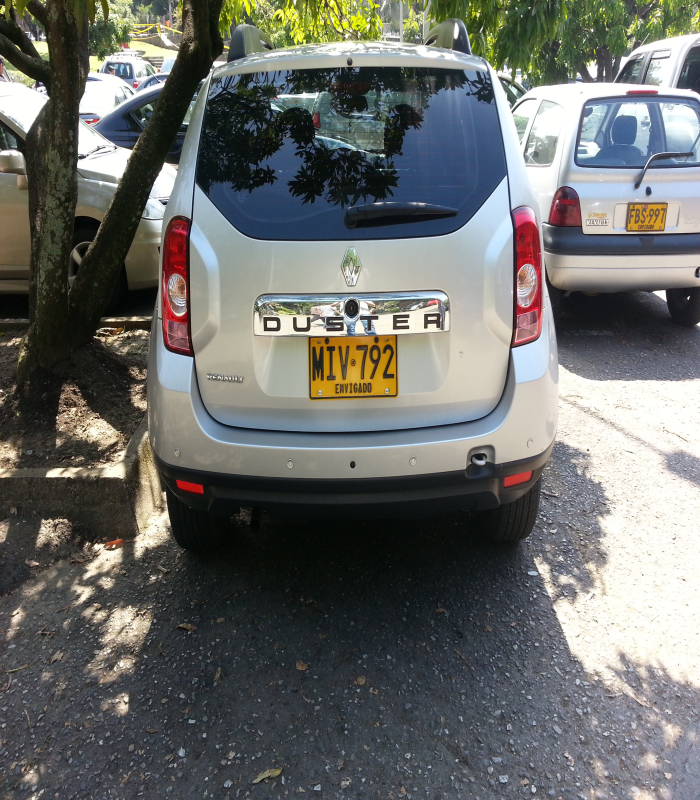

In [0]:
img2 = cv2.resize(img,(700,800),interpolation=cv2.INTER_AREA)
cv2_imshow(img2)

In [0]:
img_arroz = cv2.imread('arroz.png',cv2.IMREAD_GRAYSCALE)

In [0]:
img_noticia = cv2.imread('noticia.png')

**Imagen en el canal B (Blue)**

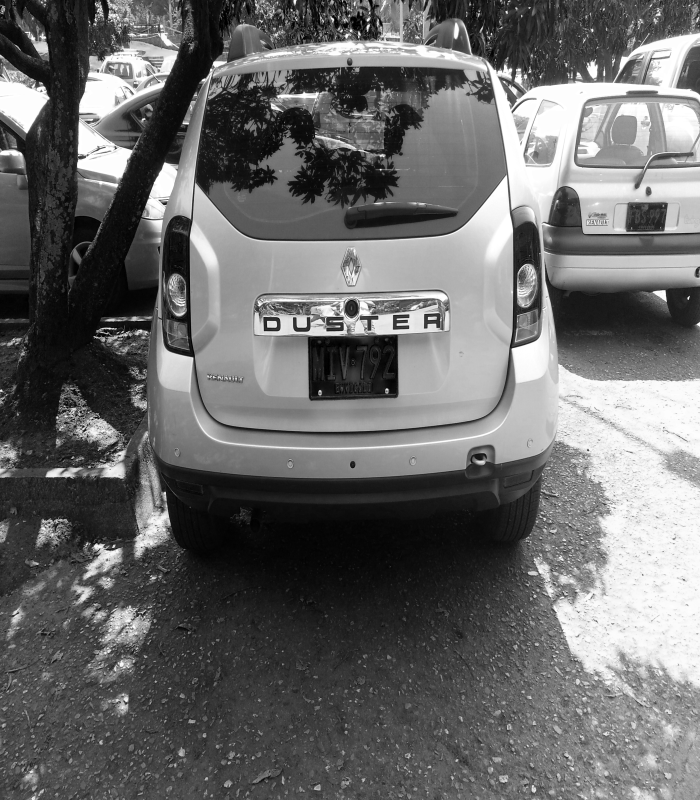

In [0]:
imgB = img2[:,:,0]
cv2_imshow(imgB)

**Imagen en el canal B negativa**

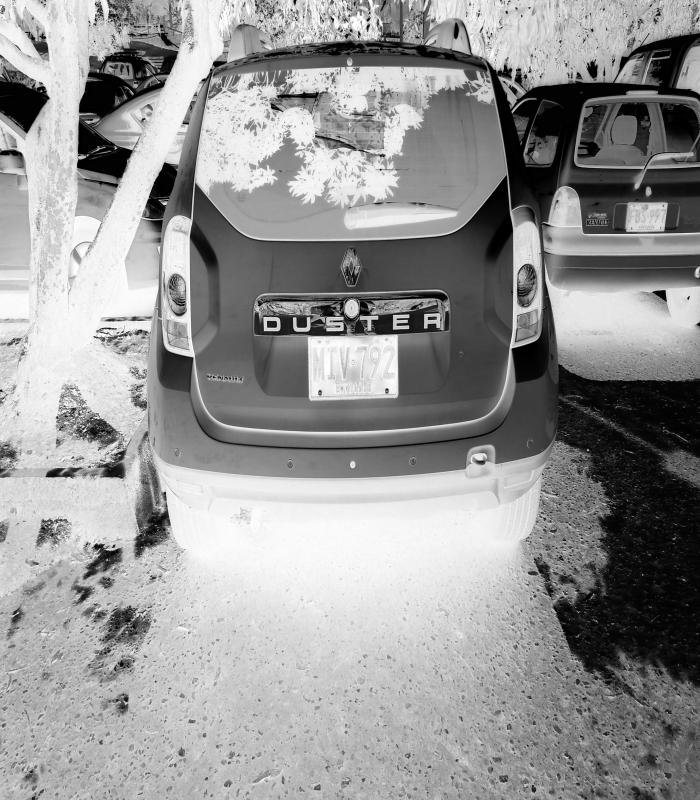

In [0]:
img_negative = 255 -imgB
cv2_imshow(img_negative)

**Imagen en el canal G Gree**

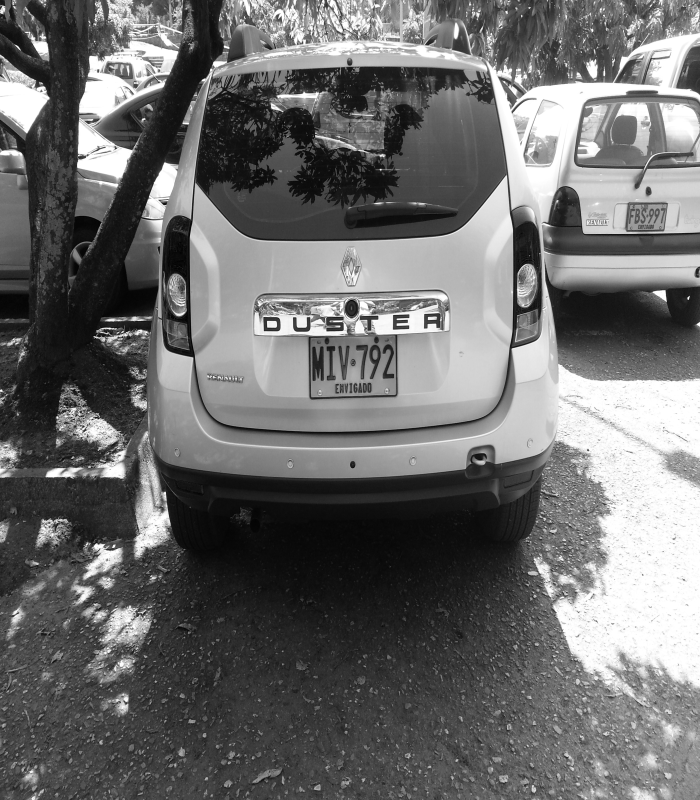

In [0]:
imgG = img2[:,:,1]
cv2_imshow(imgG)

**Imagen en el canal R Red**

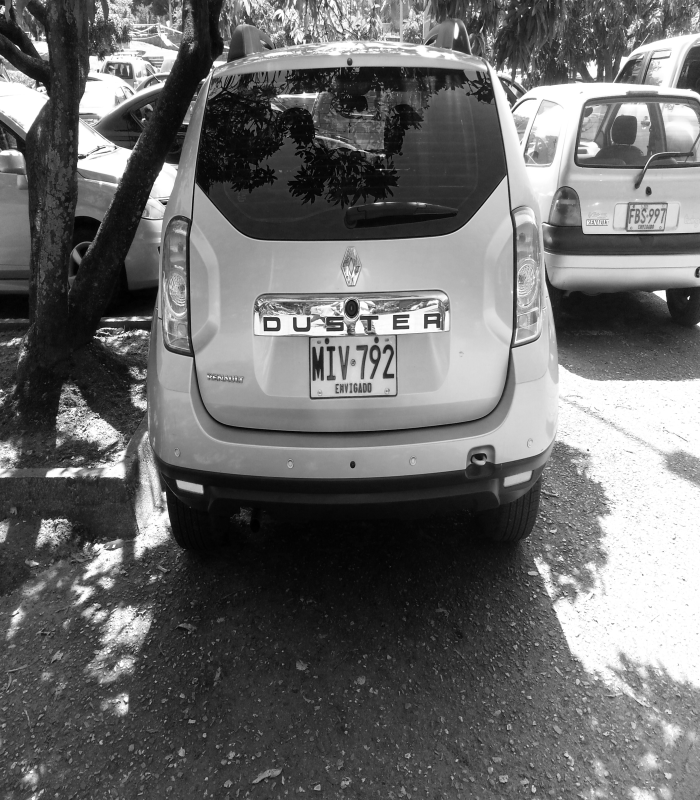

In [0]:
imgR = img2[:,:,2]
cv2_imshow(imgR)

# **Ejercicio Granos de Arroz**

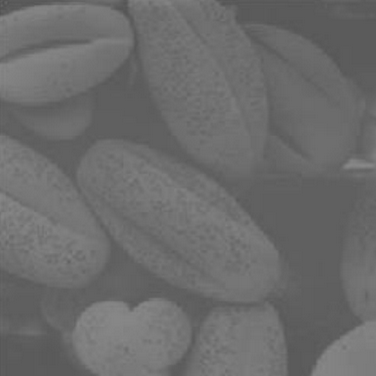

In [0]:
cv2_imshow(img_arroz)

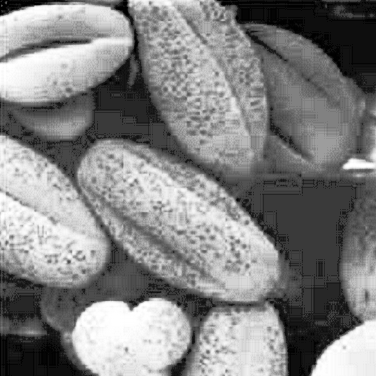

In [0]:
img_equ = cv2.equalizeHist(img_arroz)
cv2_imshow(img_equ)

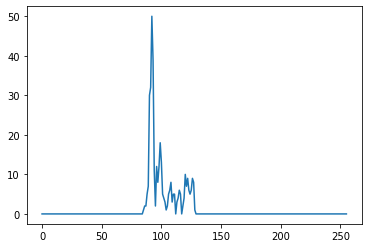

In [0]:
histo_img_arroz = cv2.calcHist(img_arroz,[0],None,[256],[0,256])
plt.plot(histo_img_arroz)
plt.show()

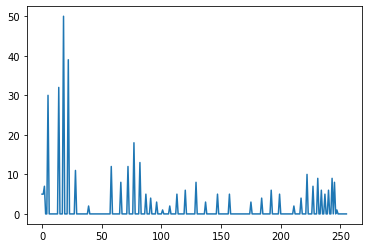

In [0]:
histo_img_arroz_equ = cv2.calcHist(img_equ,[0],None,[256],[0,256])
plt.plot(histo_img_arroz_equ)
plt.show()

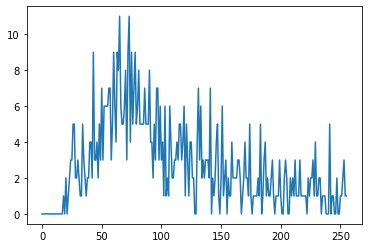

In [0]:
histo_imgR = cv2.calcHist(imgR,[0],None,[256],[0,256])
plt.plot(histo_imgR)
plt.show()

# Ejercicio Texto

Sacar las letras de una texto

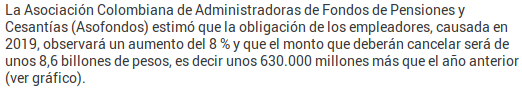

In [0]:
cv2_imshow(img_noticia)

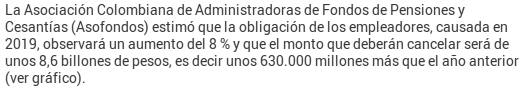

In [0]:
img_noticias_bw = cv2.cvtColor(img_noticia, cv2.COLOR_RGB2GRAY) 
cv2_imshow(img_noticias_bw)

In [0]:
img_noticias_bw[img_noticias_bw<150]=0

In [0]:
img_noticias_bw[img_noticias_bw>0]=255

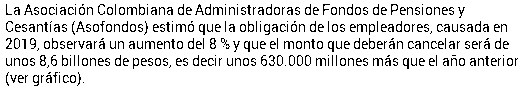

In [0]:
cv2_imshow(img_noticias_bw)

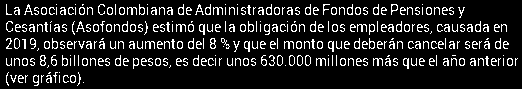

In [0]:
img_noticias_bw_neg = 255 - img_noticias_bw
cv2_imshow(img_noticias_bw_neg)

In [0]:
proy_horizontal = np.sum(img_noticias_bw_neg,axis=1)

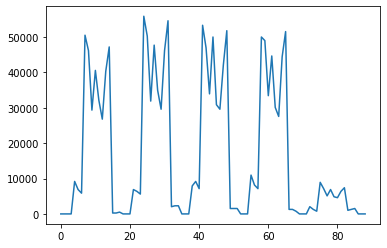

In [0]:
plt.plot(proy_horizontal)

In [0]:
linea_1 = img_noticias_bw_neg[0:20,:]
cv2_imshow(linea_1)

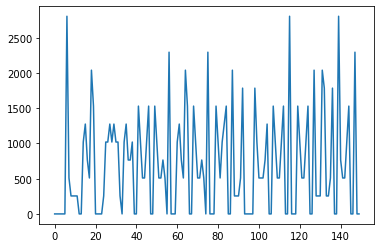

In [0]:
proy_vertical = np.sum(linea_1,axis=0)
plt.plot(proy_vertical[0:150])

In [0]:
cv2_imshow(linea_1[:,20:95])

In [0]:
cv2_imshow(linea_1[:,12:22])

In [0]:
cv2_imshow(img_noticia[0:20,12:22,:])

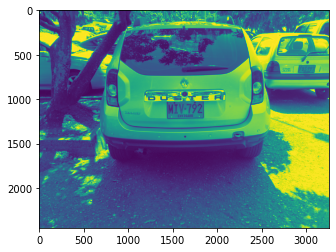

In [0]:
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgbw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(imgbw)
